In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR,SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('D:\\exe_file\\machine_learning\\stock_price_predictor\\googl.csv')
df

,Date,Open,High,Low,Close,Volume
0,20-Jul-17,997.00,998.68,984.62,992.19,1418385
1,19-Jul-17,990.01,995.60,987.01,992.77,1412148
2,18-Jul-17,973.36,990.85,972.04,986.95,1413335
3,17-Jul-17,976.32,983.35,970.80,975.96,1660464
4,14-Jul-17,974.00,977.54,970.15,976.91,1079608
5,13-Jul-17,970.80,978.70,964.80,968.85,1524571
6,12-Jul-17,960.86,969.63,957.04,967.66,1602115
7,11-Jul-17,950.52,954.89,945.12,953.53,1461247
8,10-Jul-17,941.95,953.13,941.95,951.00,1451460
9,7-Jul-17,930.98,944.66,929.79,940.81,1663302


In [3]:
dates = []
prices = []

In [4]:
df.shape

(13, 6)

In [5]:
df.tail(1)

,Date,Open,High,Low,Close,Volume
12,3-Jul-17,933.22,934.24,915.31,919.46,1694811


In [6]:
df = df.head(len(df))
df


,Date,Open,High,Low,Close,Volume
0,20-Jul-17,997.00,998.68,984.62,992.19,1418385
1,19-Jul-17,990.01,995.60,987.01,992.77,1412148
2,18-Jul-17,973.36,990.85,972.04,986.95,1413335
3,17-Jul-17,976.32,983.35,970.80,975.96,1660464
4,14-Jul-17,974.00,977.54,970.15,976.91,1079608
5,13-Jul-17,970.80,978.70,964.80,968.85,1524571
6,12-Jul-17,960.86,969.63,957.04,967.66,1602115
7,11-Jul-17,950.52,954.89,945.12,953.53,1461247
8,10-Jul-17,941.95,953.13,941.95,951.00,1451460
9,7-Jul-17,930.98,944.66,929.79,940.81,1663302


In [7]:
df.shape

(13, 6)

In [8]:
#Get all of the rows from the Date Column
df_dates = df.loc[:, 'Date']
#Get all of the rows from the Open Column
df_open = df.loc[:, 'Open']

In [9]:
df_dates

0     20-Jul-17
1     19-Jul-17
2     18-Jul-17
3     17-Jul-17
4     14-Jul-17
5     13-Jul-17
6     12-Jul-17
7     11-Jul-17
8     10-Jul-17
9      7-Jul-17
10     6-Jul-17
11     5-Jul-17
12     3-Jul-17
Name: Date, dtype: object

In [10]:
#Create the independent data set X
for date in df_dates:
  dates.append( [int(date.split('-')[0])])
  
#Create the dependent data se 'y'
for open_price in df_open:
  prices.append(float(open_price))

In [11]:
print(dates)

[[20], [19], [18], [17], [14], [13], [12], [11], [10], [7], [6], [5], [3]]


In [12]:
print(prices)

[997.0, 990.01, 973.36, 976.32, 974.0, 970.8, 960.86, 950.52, 941.95, 930.98, 925.0, 924.2, 933.22]


In [13]:
def predict_prices(dates, prices,x):
  
  #Create the 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Train the SVR models 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #Create the Linear Regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


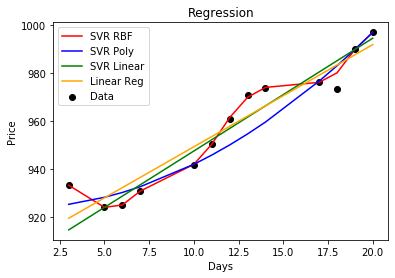

svr_rbf = 942.0502202600076
svr_lin = 947.6035714285364
svr_poly = 942.0500000122152
lin_reg = 949.3666003282725


In [14]:
svr_rbf1,svr_lin1,svr_poly1,lin_reg1 = predict_prices(dates, prices,[[10]])
print(f"svr_rbf = {svr_rbf1}")
print(f"svr_lin = {svr_lin1}")
print(f"svr_poly = {svr_poly1}")
print(f"lin_reg = {lin_reg1}")

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss



In [16]:
#confusion matrix:
g_price=[1,1,1,1]
p_price=[0,0,0,0]
results = confusion_matrix(g_price , p_price) 
print ('Confusion Matrix :')
print(results) 



Confusion Matrix :
[[0 0]
 [4 0]]


In [17]:
#accuracy score:
print( 'Accuracy Score :')
acc=accuracy_score(g_price, p_price)
print(acc) 


Accuracy Score :
0.0


In [18]:
#acuuracy for svr_rbf model:
a1=(svr_rbf1 * 100)/941.95
print(f"accuracy of svr_rbf :{a1}%")

accuracy of svr_rbf :100.01063965815676%


In [19]:
#acuuracy for svr_lin model:
a2=(svr_lin1 * 100)/941.95
print(f"accuracy of svr_lin :{a2}%")

accuracy of svr_lin :100.60019867599514%


In [20]:
#acuuracy for svr_poly model:
a3=(svr_poly1 * 100)/941.95
print(f"accuracy of svr_poly :{a3}%")

accuracy of svr_poly :100.01061627604598%


In [21]:
#acuuracy for lin_reg model: 
a4=(lin_reg1* 100)/941.95
print(f"accuracy of lin_reg :{a4}%")

accuracy of lin_reg :100.78736666789877%


In [23]:
svr_rbf.predict(10)

NameError: name 'svr_rbf' is not defined

In [24]:
lin_reg.predict(10)

NameError: name 'lin_reg' is not defined

In [25]:
svr_poly.predict(10)

NameError: name 'svr_poly' is not defined

In [ ]:
svr_lin.predict(10)